In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import decomposition as dec
from sklearn import manifold as man
from sklearn import metrics as met

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,userID,movieID,rating
0,4490,2109,4
1,5839,3471,4
2,5382,150,3
3,1262,1237,5
4,6005,2273,4


In [ ]:
train_size = round(df.shape[0]*0.999)
test_size = df.shape[0] - round(df.shape[0]*0.999) 
print("train size", train_size)
print("test size", test_size)

train_df = df[:train_size]
print(train_df.shape)
test = df[train_size:]
print(test.shape)

train size 989219
test size 990
(989219, 3)
(990, 3)


In [ ]:
U_matrix = train_df.pivot("userID", "movieID", "rating")
U_matrix.head()

movieID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,3.0,NaN,4.0,NaN,4.0,NaN,4.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,3.0,NaN,NaN,2.0,4.0,3.0,NaN,4.0,3.0,4.0,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
U_matrix_norm = U_matrix - U_matrix.mean(axis=1).values.reshape(-1,1)
U_matrix_norm.fillna(0, inplace=True)
U_matrix_norm.head()

movieID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.567164,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.567164,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-0.567164,0.000000,0.0,0.000000,0.432836,-0.567164,0.0,0.432836,0.0,0.432836,0.0,0.432836,0.0,0.0,-0.567164,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.288557,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,-0.711443,0.0,-0.711443,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,-0.299656,0.0,0.0,0.0,0.0,-0.299656,0.0,0.0,0.0,0.0,-0.299656,0.700344,0.0,0.0,0.0,-0.299656,0.0,0.0,-1.299656,0.700344,-0.299656,0.0,0.700344,-0.299656,0.700344,0.0,-0.299656,0.0,1.700344,0.0,0.000000,0.0,0.0,-0.299656,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_mean = U_matrix_norm.mean(axis=0)
centered_train = U_matrix_norm - train_mean
print(centered_train.shape)
centered_train.head()

(6040, 3705)


movieID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.730271,0.037155,0.034072,0.019444,0.019782,-0.043543,0.009054,0.004721,0.012182,0.000245,-0.032641,0.026165,0.003218,-0.000212,0.02199,-0.025977,-0.614606,0.003125,0.057859,0.020122,-0.004148,0.010813,0.012424,0.036535,-0.565244,-0.001455,0.004098,-0.010970,0.402571,-0.567325,0.008077,0.352971,0.000369,0.368188,0.003616,0.389402,-0.000023,0.002455,-0.569670,-0.00128,...,0.002228,0.002096,0.000322,-0.024512,0.018171,0.018928,0.016211,-0.00139,0.008042,0.005935,0.0165,0.003093,-0.003302,0.007441,0.002042,0.0037,-0.006279,0.012314,0.006076,-0.004137,0.003257,0.002106,0.002101,-0.001778,0.011343,0.005987,0.006332,0.00359,0.00479,0.007202,0.005901,0.001747,0.013133,0.020348,0.000754,-0.003036,-0.028099,-0.00048,-0.002369,-0.01067
2,-0.163106,0.037155,0.034072,0.019444,0.019782,-0.043543,0.009054,0.004721,0.012182,0.000245,-0.032641,0.026165,0.003218,-0.000212,0.02199,-0.025977,-0.047441,0.003125,0.057859,0.020122,-0.004148,0.010813,0.012424,0.036535,0.001920,-0.001455,0.004098,-0.010970,-0.030265,-0.000160,0.008077,-0.079865,0.000369,-0.064648,0.003616,-0.043433,-0.000023,0.002455,-0.002505,-0.00128,...,0.002228,0.002096,0.000322,-0.024512,0.018171,0.018928,0.016211,-0.00139,0.008042,0.005935,0.0165,0.003093,-0.003302,0.007441,0.002042,0.0037,-0.006279,0.012314,0.006076,-0.004137,0.003257,0.002106,0.002101,-0.001778,0.011343,0.005987,0.006332,0.00359,0.00479,0.007202,0.005901,0.001747,0.013133,0.020348,0.000754,-0.003036,-0.028099,-0.00048,-0.002369,-0.01067
3,-0.163106,0.037155,0.034072,0.019444,0.019782,-0.043543,0.009054,0.004721,0.012182,0.000245,-0.032641,0.026165,0.003218,-0.000212,0.02199,-0.025977,-0.047441,0.003125,0.057859,0.020122,-0.004148,0.010813,0.012424,0.036535,0.001920,-0.001455,0.004098,-0.010970,-0.030265,-0.000160,0.008077,-0.079865,0.000369,-0.064648,0.003616,-0.043433,-0.000023,0.002455,-0.002505,-0.00128,...,0.002228,0.002096,0.000322,-0.024512,0.018171,0.018928,0.016211,-0.00139,0.008042,0.005935,0.0165,0.003093,-0.003302,0.007441,0.002042,0.0037,-0.006279,0.012314,0.006076,-0.004137,0.003257,0.002106,0.002101,-0.001778,0.011343,0.005987,0.006332,0.00359,0.00479,0.007202,0.005901,0.001747,0.013133,0.020348,0.000754,-0.003036,-0.028099,-0.00048,-0.002369,-0.01067
4,-0.163106,0.037155,0.034072,0.019444,0.019782,-0.043543,0.009054,0.004721,0.012182,0.000245,-0.032641,0.026165,0.003218,-0.000212,0.02199,-0.025977,0.241116,0.003125,0.057859,0.020122,-0.004148,0.010813,0.012424,0.036535,0.001920,-0.001455,0.004098,-0.010970,-0.030265,-0.000160,0.008077,-0.791307,0.000369,-0.776090,0.003616,-0.043433,-0.000023,0.002455,-0.002505,-0.00128,...,0.002228,0.002096,0.000322,-0.024512,0.018171,0.018928,0.016211,-0.00139,0.008042,0.005935,0.0165,0.003093,-0.003302,0.007441,0.002042,0.0037,-0.006279,0.012314,0.006076,-0.004137,0.003257,0.002106,0.002101,-0.001778,0.011343,0.005987,0.006332,0.00359,0.00479,0.007202,0.005901,0.001747,0.013133,0.020348,0.000754,-0.003036,-0.028099,-0.00048,-0.002369,-0.01067
5,-0.163106,0.037155,0.034072,0.019444,0.019782,-0.343199,0.009054,0.004721,0.012182,0.000245,-0.332297,0.026165,0.003218,-0.000212,0.02199,-0.325632,0.652903,0.003125,0.057859,0.020122,-0.303803,0.010813,0.012424,-1.263120,0.702265,-0.301111,0.004098,0.689375,-0.329921,0.700184,0.008077,-0.379520,0.000369,1.635697,0.003616,-0.043433,-0.000023,0.002455,-0.302161,-0.00128,...,0.002228,0.002096,0.000322,-0.024512,0.018171,0.018928,0.016211,-0.00139,0.008042,0.005935,0.0165,0.003093,-0.003302,0.007441,0.002042,0.0037,-0.006279,0.012314,0.006076,-0.004137,0.003257,0.002106,0.002101,-0.001778,0.011343,0.005987,0.006332

In [ ]:
U, S, VT = np.linalg.svd(centered_train.T, full_matrices=False)

In [ ]:
print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)
print("train shape:", centered_train.shape)

U shape: (3705, 3705)
S shape: (3705,)
VT shape: (3705, 6040)
train shape: (6040, 3705)


In [ ]:
np.set_printoptions(suppress=True)

squares = np.array(list(map(lambda x:x**2, S)))
total = squares.sum()

ncomp = []

for i in range(1, len(squares)):
  r = squares[:i].sum() / total
  ncomp.append(r)
  #print(i, r)


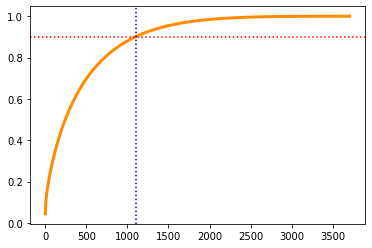

In [ ]:
plt.plot(np.linspace(1,len(squares),num=len(squares)-1),ncomp,"darkorange",lw=3)
plt.axhline(y=0.9,color="r",linestyle = ':')
plt.axvline(x=1100,color="navy",linestyle = ':')
plt.show()

In [ ]:
k = 1100
U = U[:, :k]
S = S[:k]
VT = VT[:k, :]

print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)
print("train shape:", centered_train.shape)

svd = dec.TruncatedSVD(n_components=k)
temp = svd.fit_transform(centered_train)
temp.shape

U shape: (3705, 1100)
S shape: (1100,)
VT shape: (1100, 6040)
train shape: (6040, 3705)


(6040, 1100)

In [ ]:
U_norm = U / np.linalg.norm(U, axis=1).reshape(-1,1)
sims = U_norm.dot(U_norm.T)
a = np.isnan(sims)
sims[a] = -1
sims.shape

(3705, 3705)

In [ ]:
test.head()

,userID,movieID,rating
989219,5847,344,4
989220,5626,3527,3
989221,2798,1544,3
989222,4969,1617,5
989223,4672,3175,5


In [ ]:
centered_train.head()

movieID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.567164,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.567164,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-0.567164,0.000000,0.0,0.000000,0.432836,-0.567164,0.0,0.432836,0.0,0.432836,0.0,0.432836,0.0,0.0,-0.567164,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.288557,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,-0.711443,0.0,-0.711443,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,-0.299656,0.0,0.0,0.0,0.0,-0.299656,0.0,0.0,0.0,0.0,-0.299656,0.700344,0.0,0.0,0.0,-0.299656,0.0,0.0,-1.299656,0.700344,-0.299656,0.0,0.700344,-0.299656,0.700344,0.0,-0.299656,0.0,1.700344,0.0,0.000000,0.0,0.0,-0.299656,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
myPreds = []
realLabels = []
for i in range(989219,989220): #test.index:
    movieId = int(test.movieID[i] )
    userId  = int(test.userID[i])

    test_row = centered_train.loc[userId:userId, :]
    test_row_svd = svd.transform(test_row)
    ind = list(centered_train.columns).index(movieId)
    #print(ind)
    centered_pred = test_row_svd.dot(svd.components_.T[ind])[0]
    normalized_pred = train_mean.loc[movieId] + centered_pred
    pred = U_matrix.loc[userId:userId, :].mean(axis=1).values[0] + normalized_pred
    if pred > 5:
        pred = 5
    if pred < 1:
        pred = 1  
    if np.isnan(pred):
        pred = train_mean.loc[movieId]
    real_label = test.rating[i]
    realLabels.append(real_label)
    myPreds.append(pred)
    print("mov:",movieId,"usr:",userId,"actual:",real_label,"pred:",pred)



mov: 344 usr: 5847 actual: 4 pred: 3.9848638623608967
mov: 3527 usr: 5626 actual: 3 pred: 3.8188133922756555
mov: 1544 usr: 2798 actual: 3 pred: 3.832912048711224
mov: 1617 usr: 4969 actual: 5 pred: 4.043246520362116
mov: 3175 usr: 4672 actual: 5 pred: 3.7850880503953004
mov: 1962 usr: 4147 actual: 4 pred: 4.303364563906435
mov: 1212 usr: 3534 actual: 4 pred: 3.9315618509333286
mov: 3083 usr: 965 actual: 3 pred: 3.4206651724059487
mov: 421 usr: 3107 actual: 3 pred: 3.228238004101398
mov: 2572 usr: 103 actual: 2 pred: 3.804867765020303
mov: 2337 usr: 5202 actual: 4 pred: 4.035935578965468
mov: 653 usr: 41 actual: 3 pred: 3.313028818932377
mov: 296 usr: 2522 actual: 2 pred: 3.067989698397094
mov: 20 usr: 3184 actual: 3 pred: 3.2365764446887613
mov: 50 usr: 2529 actual: 4 pred: 3.5501904107121063
mov: 3462 usr: 2495 actual: 4 pred: 3.735759436842086
mov: 2411 usr: 3665 actual: 2 pred: 3.3687964116076734
mov: 2581 usr: 3361 actual: 2 pred: 3.29116166939767
mov: 919 usr: 5278 actual: 4 pred

In [ ]:
print(met.mean_squared_error(realLabels, myPreds, squared=False))

1.0627088341800415


In [ ]:
test = pd.read_csv("test_without_labels.csv",sep="_",names=["userID","movieID"])[1:]
train = U.copy()
test.head(5)


,userID,movieID
1,629,2683.0
2,601,904.0
3,5673,3717.0
4,5616,1721.0
5,1099,3697.0


In [ ]:
myPreds = []
realLabels = []
user_and_movieID = []
t=0
for i in test.index:
    #print(i)
    movieId = int(test.movieID[i])
    userId  = int(test.userID[i])
    #print(movieId,userId) 
    user_and_movieID.append(str(userId) + "_" + str(movieId))

    test_row = centered_train.loc[userId:userId, :]
    test_row_svd = svd.transform(test_row)

    centered_pred = test_row_svd.dot(svd.components_.T[list(centered_train.columns).index(movieId)])[0]
    normalized_pred = train_mean.loc[movieId] + centered_pred
    pred = U_matrix.loc[userId:userId, :].mean(axis=1).values[0] + normalized_pred
    if pred > 5:
        pred = 5
    if pred < 1:
        pred = 1  
    if np.isnan(pred):
        pred = train_mean.loc[movieId]
    myPreds.append(pred)
    #print("mov:",movieId,"usr:",userId,"actual:",real_label,"pred:",pred)

    t += 1
    if t % 500 == 0:
        print(t)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500


In [ ]:
pd.DataFrame( { "IDs": user_and_movieID,
                "rating" : myPreds}).to_csv("submission7.csv",index=False) # RMSE = 1.02286